
# Project: Life Expectancy Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Life expectancy at birth has risen rapidly during the last century due to a number of factors, including reductions in infant mortality, rising living standards, improved lifestyles and better education, as well as advances in healthcare and medicine.

> This analysis  meant to explore what was the average life expectancy before, how did it grow during the years and what are the projections for the future up until the end of the 21st century.  I don't intend to draw any correlation between this and other data sets, regarding infant mortality, education and healthcare because I don't think these can clearly be related (without further analysis).

> However, I'm planning to explore the data and find answers to the questions below:
> - What was the average life expectancy in the 1800s, 1900s, 1950s and 2000s? 
> - Which countries has the highest life expectancy data now?
> - Which countries has the lowest life expectancy data now?
> - How does these two compare? 
> - How much did life expectancy grow since the 1970s on average?

The source of data is:


> If you can't wait to see how you fit in, try this link to calculate your life expectancy: https://www.disabled-world.com/calculators-charts/health-age.php

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. 

### General Properties

In [4]:
df = pd.read_csv('life_expectancy_at_birth_with_projections.csv', index_col=0)

Let's see how the columns and rows look like by using the countries as index.

In [5]:
df.head(20)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9
Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,86.1,86.2,86.3,86.4,86.5,86.6,86.7,86.8,86.9,87.0
Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,86.7,86.8,86.9,87.0,87.1,87.2,87.3,87.4,87.5,87.6
Armenia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,85.4,85.5,85.6,85.7,85.8,85.9,86.0,86.2,86.3,86.4
Australia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,91.0,91.2,91.3,91.4,91.5,91.6,91.7,91.8,91.9,92.0
Austria,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,...,90.8,90.9,91.0,91.1,91.2,91.3,91.5,91.6,91.7,91.8


In [6]:
df.tail(20)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Timor-Leste,28.9,28.9,28.9,28.9,28.9,28.9,28.9,28.9,28.9,28.9,...,82.0,82.1,82.3,82.4,82.5,82.7,82.8,83.0,83.1,83.2
Togo,31.3,31.3,31.3,31.3,31.3,31.3,31.3,31.3,31.3,31.3,...,77.8,78.0,78.1,78.2,78.4,78.5,78.6,78.8,78.9,79.0
Tonga,28.2,28.2,28.2,28.2,28.2,28.2,28.2,28.2,28.2,28.2,...,80.4,80.5,80.7,80.8,80.9,81.1,81.2,81.3,81.5,81.6
Trinidad and Tobago,32.9,32.9,32.9,32.9,32.9,32.9,32.9,32.9,32.9,32.9,...,84.1,84.2,84.3,84.5,84.6,84.7,84.8,85.0,85.1,85.2
Tunisia,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,89.1,89.2,89.3,89.5,89.6,89.7,89.8,89.9,90.0,90.1
Turkey,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,...,90.8,90.9,91.0,91.1,91.3,91.4,91.5,91.6,91.7,91.8
Turkmenistan,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,...,79.5,79.7,79.8,79.9,80.1,80.2,80.4,80.5,80.6,80.8
Uganda,25.3,25.3,25.3,25.3,25.3,25.3,25.3,25.3,25.3,25.3,...,80.9,81.0,81.2,81.3,81.5,81.6,81.8,81.9,82.1,82.2
Ukraine,36.6,36.6,36.6,36.6,36.6,36.6,36.6,36.6,36.6,36.6,...,80.5,80.7,80.8,80.9,81.0,81.1,81.3,81.4,81.5,81.6


I can see a couple of missing values from Andorra for example, I'll drop or replace that in the next section.


In [7]:
df.shape

(184, 301)

In [8]:
df.dtypes

1800    float64
1801    float64
1802    float64
1803    float64
1804    float64
         ...   
2096    float64
2097    float64
2098    float64
2099    float64
2100    float64
Length: 301, dtype: object

There are 187 rows and 302 columns

In [9]:
df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.00000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.00000,184.000000
mean,31.502717,31.461957,31.478804,31.383152,31.459239,31.586413,31.644565,31.598370,31.383152,31.310326,...,83.758152,83.87663,83.996196,84.119022,84.236957,84.358152,84.478804,84.593478,84.71087,84.829891
std,3.814689,3.806303,3.938674,3.962376,3.934674,4.010884,4.110598,3.981247,4.087872,4.040580,...,5.600794,5.59444,5.589074,5.577601,5.570850,5.566060,5.556903,5.550234,5.54055,5.532609
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,67.100000,67.30000,67.400000,67.500000,67.600000,67.700000,67.800000,67.900000,68.00000,68.100000
25%,29.075000,28.975000,28.900000,28.900000,28.975000,29.075000,29.075000,29.075000,28.975000,28.875000,...,79.500000,79.70000,79.800000,79.900000,80.075000,80.200000,80.375000,80.475000,80.57500,80.775000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,84.200000,84.35000,84.450000,84.550000,84.650000,84.750000,84.850000,85.000000,85.15000,85.250000
75%,33.825000,33.900000,33.825000,33.625000,33.725000,33.825000,33.925000,33.925000,33.725000,33.625000,...,88.125000,88.22500,88.325000,88.500000,88.600000,88.700000,88.800000,88.900000,89.00000,89.100000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,93.700000,93.90000,94.000000,94.100000,94.200000,94.300000,94.400000,94.500000,94.70000,94.800000


I'm interested in the mean and min, max values here. Now let's see how many missing values we have in total.

In [10]:
df.isnull().sum()

1800    0
1801    0
1802    0
1803    0
1804    0
       ..
2096    0
2097    0
2098    0
2099    0
2100    0
Length: 301, dtype: int64

In [11]:
df.count()

1800    184
1801    184
1802    184
1803    184
1804    184
       ... 
2096    184
2097    184
2098    184
2099    184
2100    184
Length: 301, dtype: int64

That's fine, there are a couple as expected. I'll deal with that in the next section. Now let's see if there are any duplicates?

In [12]:
df.duplicated().sum()

0

There are no duplicates.

### Dropping countries with missing values from the dataset

In [13]:
df = df.dropna(axis=0)

Checking if there are no more missing values in the dataset.

In [14]:
df.isnull().sum()

1800    0
1801    0
1802    0
1803    0
1804    0
       ..
2096    0
2097    0
2098    0
2099    0
2100    0
Length: 301, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### What was the average life expectancy in the 1800s, 1900s, 1950s and 2000s? 


In [15]:
df['1800'].mean()

31.502717391304348

In [16]:

df['1900'].mean()

33.61086956521738

In [17]:
df['1950'].mean()

50.082608695652205

In [18]:
df['2000'].mean()

67.40923913043478

Let's see how does that look like on a boxplot.

<AxesSubplot:>

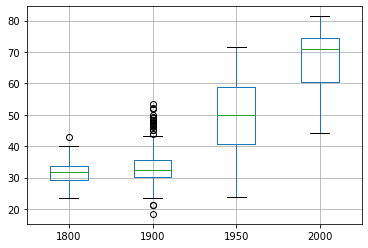

In [19]:
df.boxplot(column=['1800','1900','1950','2000'])

From the boxplot and the analysis before, we can see how the mean values have changed drastically over time in the last two centuries.

### Which countries have the highest life expectancy data now?

To determine this, first, I would like to see the values for 25 and 75% of the data.

In [20]:
df['2020'].describe()

count    184.000000
mean      73.391304
std        6.813393
min       53.300000
25%       68.475000
50%       74.350000
75%       78.600000
max       85.300000
Name: 2020, dtype: float64

Excellent. Then I will take values above 75% as the countries with the highest life expectancy, and the values below 25% as the lowest countries, exemined in the next section.

In [21]:
df_highest_countries = df[df['2020'] > 78.6]
df_highest_countries.head(10)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Australia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,91.0,91.2,91.3,91.4,91.5,91.6,91.7,91.8,91.9,92.0
Austria,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,...,90.8,90.9,91.0,91.1,91.2,91.3,91.5,91.6,91.7,91.8
Bahrain,30.3,30.3,30.3,30.3,30.3,30.3,30.3,30.3,30.3,30.3,...,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2,89.3,89.4
Belgium,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.1,40.1,40.1,...,90.4,90.5,90.6,90.7,90.8,91.0,91.1,91.2,91.3,91.4
Canada,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,...,90.6,90.7,90.8,90.9,91.0,91.2,91.3,91.4,91.5,91.6
Chile,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,89.6,89.7,89.8,89.9,90.0,90.1,90.2,90.3,90.4,90.5
Colombia,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,91.0,91.1,91.2,91.3,91.4,91.5,91.7,91.8,91.9,92.0
Costa Rica,30.2,30.2,30.2,30.2,30.2,30.2,30.2,30.2,30.2,30.2,...,89.3,89.3,89.5,89.6,89.7,89.8,89.9,90.0,90.1,90.2
Croatia,36.1,36.1,36.1,36.1,36.1,36.1,36.1,36.1,36.1,36.1,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.2,89.3


We can see the top 10 countries with the highest life expectancy. 

Now I would like to find the country which has the highest life expectancy above all.

In [22]:
df['2020'].max()

85.3

In [23]:
df['2020'].idxmax()

'Singapore'

In [24]:
df_highest = df[df['2020'] >= df['2020'].max()]

In [25]:
df_highest

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Singapore,29.1,29.1,29.1,29.1,29.1,29.1,29.1,29.1,29.1,29.1,...,93.7,93.8,93.9,94.0,94.2,94.3,94.4,94.5,94.6,94.7


Singapore has the highest life expentancy.

### Which countries has the lowest life expectancy data now?


In [26]:
df['2020'].describe()

count    184.000000
mean      73.391304
std        6.813393
min       53.300000
25%       68.475000
50%       74.350000
75%       78.600000
max       85.300000
Name: 2020, dtype: float64

In [27]:
df_lowest_countries = df[df['2020'] < 68.47]
df_lowest_countries.head(10)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9
Benin,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,...,77.6,77.7,77.9,78.0,78.1,78.3,78.4,78.5,78.7,78.8
Burkina Faso,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2,...,77.2,77.3,77.5,77.6,77.7,77.8,78.0,78.1,78.2,78.4
Burundi,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,...,76.8,77.0,77.1,77.2,77.4,77.5,77.7,77.8,78.0,78.1
Cameroon,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,78.3,78.4,78.5,78.7,78.8,79.0,79.1,79.2,79.3,79.5
Central African Republic,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,67.1,67.3,67.4,67.5,67.6,67.7,67.8,67.9,68.0,68.1
Chad,30.9,30.9,30.9,30.9,30.9,30.9,30.9,30.9,30.9,30.9,...,76.7,76.8,77.0,77.1,77.3,77.4,77.5,77.7,77.8,77.9
"Congo, Dem. Rep.",31.6,31.6,31.6,31.6,31.6,31.6,31.6,31.6,31.6,31.6,...,75.6,75.7,75.8,76.0,76.1,76.2,76.3,76.4,76.5,76.7


We can see the top 10 countries with the lowest life expectancy.

Now let's see which of these has the lowest numbers.

In [28]:
df_lowest = df[df['2020'] <= df['2020'].min()]

In [29]:
df_lowest

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Central African Republic,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,67.1,67.3,67.4,67.5,67.6,67.7,67.8,67.9,68.0,68.1


The Central African Republic has the lowest life expentancy.

### Comparison between highest and lowest life expectancy

Let's see how do these compare visually. 


Step 1:
For better visualisation, I will switch the rows with the columns.

Step 2: 
Generate a line chart for both countries to compare.

In [30]:
df_transposed = df.T

In [31]:
df_highest_transposed = df_highest.T

In [32]:
df_highest_transposed.tail()

country,Singapore
2096,94.3
2097,94.4
2098,94.5
2099,94.6
2100,94.7


In [33]:
df_lowest_transposed = df_lowest.T

In [34]:
df_lowest_transposed.tail()

country,Central African Republic
2096,67.7
2097,67.8
2098,67.9
2099,68.0
2100,68.1


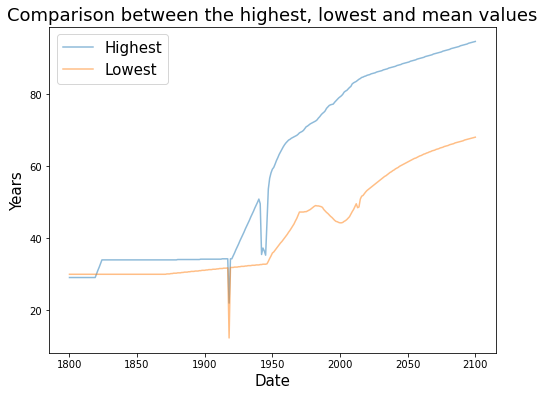

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df_highest_transposed, alpha=0.5, label='Highest')
ax.plot(df_lowest_transposed, alpha=0.5, label='Lowest')
ax.set_title('Comparison between the highest, lowest and mean values', fontsize=18)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Years', fontsize=15)
ax.legend(loc='upper left', fontsize=15)
ax.set_xticks(['1800','1850','1900','1950','2000','2050','2100']); 

I can see an interesting drop between the 1910's and 20's in both datasets, let's look into that more.



In [36]:
df_lowest_transposed.loc[df_lowest_transposed['Central African Republic'] <= 30]

country,Central African Republic
1800,30.0
1801,30.0
1802,30.0
1803,30.0
1804,30.0
...,...
1868,30.0
1869,30.0
1870,30.0
1871,30.0


In [37]:
df_highest_transposed.loc[df_highest_transposed['Singapore'] <= 30]

country,Singapore
1800,29.1
1801,29.1
1802,29.1
1803,29.1
1804,29.1
1805,29.1
1806,29.1
1807,29.1
1808,29.1
1809,29.1


It's not a mistake, the numbers dropped at 1918 in both countries and has something to do with the First World War.

### How much did life expectancy grow since the 1970s on average?



Let's see the growth in percentage.

In [38]:
df[['1970','1975','1980','1985','1990','1995', '2000','2005','2010','2015','2020']].pct_change(axis='columns').mean()

1970         NaN
1975    0.031448
1980    0.033902
1985    0.021120
1990    0.019529
1995    0.004325
2000    0.015232
2005    0.021472
2010    0.026519
2015    0.029530
2020    0.018880
dtype: float64

We can see a steady growth in the last couple of decades of the 1900's and the first couple of the 2000's. 


<a id='conclusions'></a>
## Conclusions


Results:
- We can conclude that average life expectancy has dubled since the 1800s.

- Currently the country with the lowest life expectancy is the Central African Republic and its opposite is Singapore.

- From the visuals, we can see that life expentancy data was hugely influenced by the First World War.

- Finally, we can see the growth in average life expectancy data in percentage.



Limitations:


- I deliberately did not merge any other datasets into this one to not let myself make false correlations without further research or knowledge.

- Dropped countries with missing values so these don't count as respresented in this dataset.

In [39]:
df.to_csv('life_expectancy_at_birth_with_projections.csv')